# K-Means on dataset Bounding Boxes
Since we need to get 3 anchors per output we decided to follow the original paper approach of studying the training dataset to get meaningful results

In [1]:
#Importing needed packages
import numpy as np
import pathlib
from sklearn.cluster import KMeans
from DatasetFormatting import json_parser, json_cleaner

## Loading BB
We're gonna load all bounding boxes in a NumPy array and check its shape

In [2]:
main_folder = '/home/andrea/AI/ispr_yolo/data/dataset_bdd/labels'
json_train_dir = main_folder + '/bdd100k_labels_images_train.json'
data_train = json_parser(json_train_dir)
data_train = json_cleaner(data_train)

In [3]:
pos_counter = 0
bb_array =  []
for item in data_train:
    for obj in item['labels']:
        bb_array.append([obj['box2d']['wb'],obj['box2d']['hb']])
        pos_counter += 1

bounding_boxes = np.array(bb_array)
bounding_boxes.shape

(1286871, 2)

## Performing the calculation
May take a while!

In [9]:
kmeans = KMeans(n_clusters = 9)
y_pred = kmeans.fit_predict(bounding_boxes)

In [5]:
anchors = np.around(kmeans.cluster_centers_).tolist()
anchors = sorted(anchors, key = lambda x: x[0]*x[1])
anchors = [(round(x[0]),round(x[1])) for x in anchors]
print(anchors)

[(10, 10), (22, 23), (47, 33), (39, 81), (81, 54), (126, 86), (118, 168), (194, 130), (257, 220)]


Text(0, 0.5, 'Height')

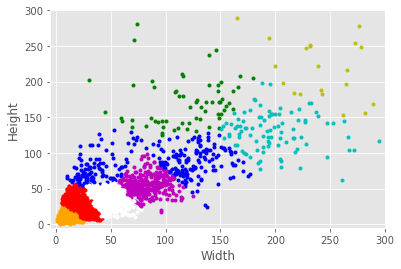

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

some_ones = bounding_boxes[::200]
pred = y_pred[::200]
colors = ['r','b','orange','m','y','g', 'b', 'c', 'w']

plt.style.use('ggplot')
for idx, bb in enumerate(some_ones):
    plt.plot(bb[0], bb[1], color = colors[pred[idx]], marker = '.')
plt.axis([-5,300,-5,300])
plt.xlabel('Width')
plt.ylabel('Height')